In [29]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [214]:
#runs = ['id52', 'id53', 'id54', 'id55'] # lr 1e-3
runs = ['id56', 'id57', 'id58', 'id59'] # lr 1e-4
runs = ['.']
tags = ['Epoch_reward', 'act_collective_pitch__deg_', 'act_generator_torque__Nm_', 'obs_rotational_speed__rad_s_', 'obs_power__kW_']
labels = {
    tags[0]: ['epoch', 'reward'],
    tags[1]: ['step', 'pitch angle [deg]'],
    tags[2]: ['step', 'generator torque [Nm]'],
    tags[3]: ['step', 'rotational speed [rad/s]']
}

In [215]:
# Load data
global_data = {}
for run in runs:
    global_data[run] = {}
    for tag in tags:
        filename = 'data/run-%s-tag-%s.json' % (run, tag)
        try:
            with open(filename, 'r') as f:
                global_data[run][tag] = json.loads(f.read())
        except:
            pass

In [122]:
# Define some helper functions
def get_step(run, tag):
    return [step for [time,step,value] in global_data[run][tag]]
def get_time(run, tag):
    return [time for [time,step,value] in global_data[run][tag]]
def get_value(run, tag):
    return [value for [time,step,value] in global_data[run][tag]]

def get_dict(run, tag):
    return dict([(step, value) for [time,step,value] in global_data[run][tag]])


In [216]:
# eval by tags
by_tags = {}
for tag in tags:
    by_tags[tag] = pd.DataFrame([get_dict(run, tag) for run in runs if run in global_data and tag in global_data[run]], runs).transpose()

In [46]:
# Plot the full timeline across all runs
def plot_all(tag):
    mean = by_tags[tag].mean(axis=1) 
    stddev = by_tags[tag].std(axis=1) * (1.68/math.sqrt(4))
    plt.plot(mean)
    plt.xlabel(labels[tag][0])
    plt.ylabel(labels[tag][1])
    plt.fill_between(mean.keys(), mean.values-stddev.values, mean.values+stddev.values, alpha=0.2)
    
for tag in tags:
    plot(tag)
    plt.savefig('plot%s.png' % tag, dpi=300)
    plt.close()

In [186]:
by_tags[tags[2]]

.
0       192970.25
1       338470.25
2       483970.25
3       629470.25
4       774970.25
...           ...
178337       0.00
178338       0.00
178339       0.00
178340       0.00
178341       0.00

[178342 rows x 1 columns]

In [190]:
# find mean and max
data = by_tags[tags[0]]


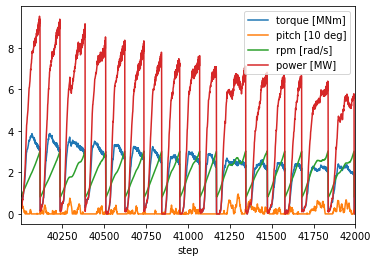

In [217]:
# plot a single epoch
epoch = 20
run = '.'
pitch = tags[1]
torque = tags[2]
rpm = tags[3]
power = tags[4]
start = epoch*2000 + 1
end = (epoch+1)*2000 + 1

data = pd.DataFrame({
    "torque [MNm]": by_tags[torque][run][start:end]/1000000,
    "pitch [10 deg]": by_tags[pitch][run][start:end]/10,
    "rpm [rad/s]": by_tags[rpm][run][start:end],
    "power [MW]": by_tags[power][run][start:end]/1000,
})

data.plot()
plt.xlabel("step")
plt.savefig('crashing turbines.png', dpi=300)